# Análise de preço dos medicamentos no Brasil


## Dataset:
Os dados representam a lista de preços de Medicamentos , contemplando o preço Fábrica, ou preço fabricante (PF), que é o preço praticado pelas empresas produtoras ou importadoras do produto e pelas empresas distribuidoras. O PF indica o preço máximo permitido para venda a farmácias, drogarias e entes da Administração Pública. http://dados.gov.br/dataset/anvisa-precos-de-medicamentos
Última Atualização	November 10, 2017;



### Blibliotecas e algumas funções legais. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
sns.set(style="ticks", color_codes=True)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

#### Importando a brincadeirinha...

In [2]:
preco_med = pd.read_csv('TA_PRECOS_MEDICAMENTOS.csv', sep = ';', encoding='latin-1')

#### Descomentar o código abaixo para entender melhor dados

In [3]:
#preco_med.info(verbose=True)
#draw_missing_data_table(preco_med)
#preco_med.head(n=100)

### Ordenando a tabela de acordo com o preço dos medicamentos e vendo as 30 primeiras linhas.

In [4]:
preco_med = preco_med.stack().str.replace(',','.').unstack()
preco_med['NU_PF18_INTEIRO'] = preco_med['NU_PF18_INTEIRO'].astype('float64')
preco_ord = preco_med.sort_values(by=['NU_PF18_INTEIRO'], ascending = False)
preco_ord.head(n=30)

,NU_CNPJ,NO_RAZAO_SOCIAL,NU_REGISTRO,CO_GGREM,CO_EAN,NO_PRODUTO,DS_APRESENTACAO,DS_CAS,DS_SUBSTANCIA,TP_PRODUTO,TP_LCCT,ST_REST_HOSP,ST_CAP,ST_CONFAZ87,NU_PF0_INTEIRO,NU_PF18_INTEIRO
51084,NaN,NATCOFARMA DO BRASIL LTDA,1826100020151,NaN,7898565164014,Everolimo,10 MG COM CT BL AL PLAS PVC TRANS X 1400,159351-69-6,everolimo,NaN,I,S,N,N,NaN,378663.96
49095,NaN,BIOGEN BRASIL PRODUTOS FARMACÊUTICOS LTDA,1699300080010,NaN,7898926573349,Spinraza,2.4 MG/ML SOL INJ CT FA VD TRANS X 5 ML,1258984369,NUSINERSENA,NaN,N,S,S,N,NaN,372185.41
49834,NaN,ALEXION FARMACEUTICA BRASIL IMPORTACAO E DISTR...,1981100020045,NaN,7898636010059,Strensiq,100 MG/ML SOL INJ CT 12 FA VD INC X 0.8 ML,1174277805,ALFA-ASFOTASE,NaN,N,N,N,N,NaN,269630.21
47732,NaN,BLAU FARMACÊUTICA S.A.,1163701430095,NaN,7896014686162,BOTULIM,200 U PÓ LIOF INJ 01 CT C/ 100 FR AMP INC (EMB...,93384-43-1,toxina botulínica A,NaN,I,S,N,N,NaN,230543.91
46078,NaN,BLAU FARMACÊUTICA S.A.,1163700440283,NaN,7896014653355,IMUNOGLOBULIN,50 MG/ML SOL INJ CX 100 FA VD INC X 200 ML,Ref4-68,imunoglobulina humana,NaN,I,S,N,N,NaN,230487.15
51080,NaN,NATCOFARMA DO BRASIL LTDA,1826100020100,NaN,7898565163970,Everolimo,5 MG COM CT BL AL PLAS PVC TRANS X 1400,159351-69-6,everolimo,NaN,I,S,N,N,NaN,189331.68
50540,NaN,BLANVER FARMOQUIMICA E FARMACEUTICA S.A.,1152400050026,NaN,7898581710264,SOFOSBUVIR,400 MG COM REV CX 50 FR PLAS OPC X 28,1190307-88-0,SOFOSBUVIR,NaN,N,N,S,N,NaN,168077.65
51083,NaN,NATCOFARMA DO BRASIL LTDA,1826100020143,NaN,7898565164007,Everolimo,10 MG COM CT BL AL PLAS PVC TRANS X 560,159351-69-6,everolimo,NaN,I,S,N,N,NaN,151465.59
49833,NaN,ALEXION FARMACEUTICA BRASIL IMPORTACAO E DISTR...,1981100020037,NaN,7898636010042,Strensiq,40 MG/ML SOL INJ CT 12 FA VD INC X 1 ML,1174277805,ALFA-ASFOTASE,NaN,N,N,N,N,NaN,134815.10
50633,NaN,BIOMARIN BRASIL FARMACÊUTICA LTDA,1733300030017,NaN,5391524461268,BRINEURA,30 MG/ML SOL INFUS CT 2 FA VD TRANS X 5 ML + 1...,151662361,ALFACERLIPONASE,NaN,N,S,N,N,NaN,125036.67


### Analizando os medicamentos acima de R$ 100.000,00

In [5]:
mais_caros = preco_ord.loc[preco_ord['NU_PF18_INTEIRO'] > 100000]
mais_caros = mais_caros[['NO_RAZAO_SOCIAL','NO_PRODUTO','TP_PRODUTO','NU_PF18_INTEIRO']]

mais_caros.head()

,NO_RAZAO_SOCIAL,NO_PRODUTO,TP_PRODUTO,NU_PF18_INTEIRO
51084,NATCOFARMA DO BRASIL LTDA,Everolimo,NaN,378663.96
49095,BIOGEN BRASIL PRODUTOS FARMACÊUTICOS LTDA,Spinraza,NaN,372185.41
49834,ALEXION FARMACEUTICA BRASIL IMPORTACAO E DISTR...,Strensiq,NaN,269630.21
47732,BLAU FARMACÊUTICA S.A.,BOTULIM,NaN,230543.91
46078,BLAU FARMACÊUTICA S.A.,IMUNOGLOBULIN,NaN,230487.15


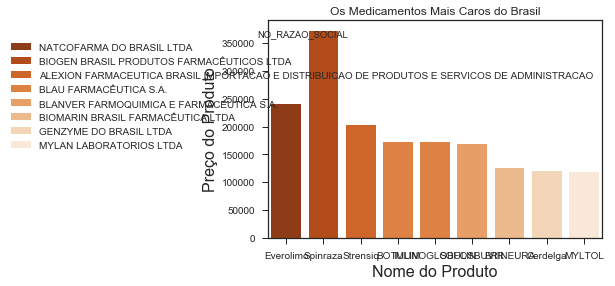

In [6]:
g = sns.barplot(x="NO_PRODUTO", y="NU_PF18_INTEIRO", 
            hue="NO_RAZAO_SOCIAL",  data=mais_caros,
                ci = None, palette = "Oranges_r", dodge = False);
    
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Os Medicamentos Mais Caros do Brasil')
plt.ylabel('Preço do Produto', fontsize=16)
plt.xlabel('Nome do Produto', fontsize=16)


plt.show()

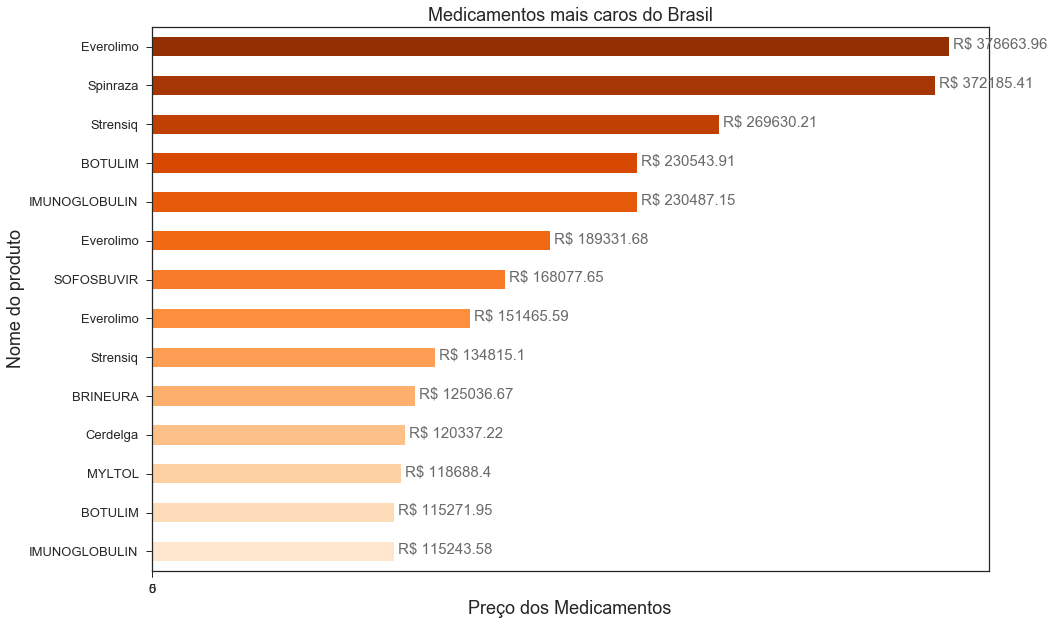

In [7]:
#tentativa de colocar os números  em cima das barras
plotando = mais_caros.set_index('NO_PRODUTO');

ax = plotando['NU_PF18_INTEIRO'].plot(kind='barh',figsize=(15,10), 
                                      fontsize=13, color = sns.color_palette("Oranges_r", 15));
ax.set_alpha(0.8)
ax.set_title("Medicamentos mais caros do Brasil", fontsize=18)
ax.set_xlabel("Preço dos Medicamentos", fontsize=18);
ax.set_ylabel("Nome do produto", fontsize=18);
ax.set_xticks([0, 5])


# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            " R$ "+str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')


# invert for largest on top 
ax.invert_yaxis()
plt.savefig(fname="mais caros.png")

In [8]:
#Explorando outra abordagem de análise...


### Referência para exploracao dos dados:
Pedro Marcelino
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python

### Referência para plotagem:
http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

### Dicionário de dados:
NU_CNPJ: Código de identificação da pessoa jurídica.
  
NO_RAZAO_SOCIAL: Razão Social da pessoa jurídica.
  
NU_REGISTRO: Número de registro do medicamento na Anvisa.
  
CO_GGREM: Código da apresentação de um produto.
  
CO_EAN: Número que representa o código de barras do produto.
  
NO_PRODUTO: Nome do medicamento.
  
DS_APRESENTACAO: Descrição da apresentação de um produto.
  
DS_CAS: Número de registro presente no banco de dados do Chemical Abstract Service - CAS , onde são designados às substâncias, de maneira seqüencial, à medida que estas são colocadas na Base de Dados do CAS. Desta forma, cada número de registro CAS é um identificador numérico único, que designa apenas uma substância e que não possui significado químico algum.
  
DS_SUBSTANCIA: Nome da Substância da apresentação do medicamento.
  
TP_PRODUTO: Tipo do produto referente à apresentação. Valores de domínio: 1 - GENÉRICO, 2 - PATENTE, 3 - REFERÊNCIA, 4 - SIMILAR, 5 - NOVO, 6 - ESPECÍFICO, 7 - BIOLÓGICOS, 8 - DINAMIZADO, 9 - FITOTERÁPICO, 10 - RADIOFÁRMACO, 11 - BIOLÓGICOS NOVOS
  
TP_LCCT: Indicador de medicamento com ou sem crédito tributário de PIS/PASEP E COFINS. Assume os valores: I, II, III, N e NA
  
ST_REST_HOSP: Indica que o medicamento é ou não de venda exclusiva a hospitais.
  
ST_CAP: Indica que o medicamento está ou não na lista do cap e por isso devera ser comercializado junto ao governo com preços diferenciados, sendo um desconto mínimo obrigatório a ser aplicado pelas distribuidoras e empresas produtoras de medicamentos ao preço de produtos vendidos a entes da administração pública. A aplicação do coeficiente estabelece um preço teto para compras governamentais, a partir do qual se deve iniciar o processo de negociação.
  
ST_CONFAZ87: Indica que o medicamento está ou não na lista do confaz que isenta de ICMS algumas apresentações quando vendidas a entes da Administração Pública.
  
NU_PF0_INTEIRO: Preço Fábrica de teto permitido para a comercialização com isenção do imposto de ICMS.
  
NU_PF18_INTEIRO: Preço Fábrica de teto permitido para a comercialização sem isenção do imposto de ICMS.